In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.hyperparams as hyp
import lbg_forecast.tools as tools
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo


In [3]:
#uniform distribution for all
hyper_parameter_bounds = hyp.define_hyperparameter_bounds(
    zred = np.array([0, 0, 7]),
    logtage = np.array([0, -3, 1]),
    logzsol = np.array([0, -2.5, 0.5]),
    dust1 = np.array([0, 0, 2]),
    dust2 = np.array([0, 0, 2]),
    igm_factor = np.array([0, 0, 2]),#np.array([2, 0, 2]),
    gas_logu = np.array([0, -4, -1]),
    fagn = np.array([0, 0, 10]),
    imf1 = np.array([0, 0.2, 2.6]), 
    imf2 = np.array([0, 1.0, 3.4]), 
    imf3 = np.array([0, 1.0, 3.4]), 
    logtau = np.array([0, -4, 1]),
    loga = np.array([0, -3, 3]),
    logb = np.array([0, -3, 3]),
    logmass = np.array([0, 7, 13])
)

hyperparameters = hyp.sample_hyper_parameters(hyper_parameter_bounds)
#hyp.plot_hyperparameters(10000, hyper_parameter_bounds, rows=7, nbins=20)


/var/folders/s9/j1tshp4s5019kbkk8hz2q9840000gn/T/ipykernel_29960/3922109360.py:1: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  spsparams = tools.draw_sps_parameters(100000, hyperparameters)


{0.4, 0.8, 2.0, 1.6, 1.2, 2.4} {1.2, 2.0, 2.4, 2.8, 1.6, 3.2} {1.2, 2.0, 2.4, 2.8, 1.6, 3.2}


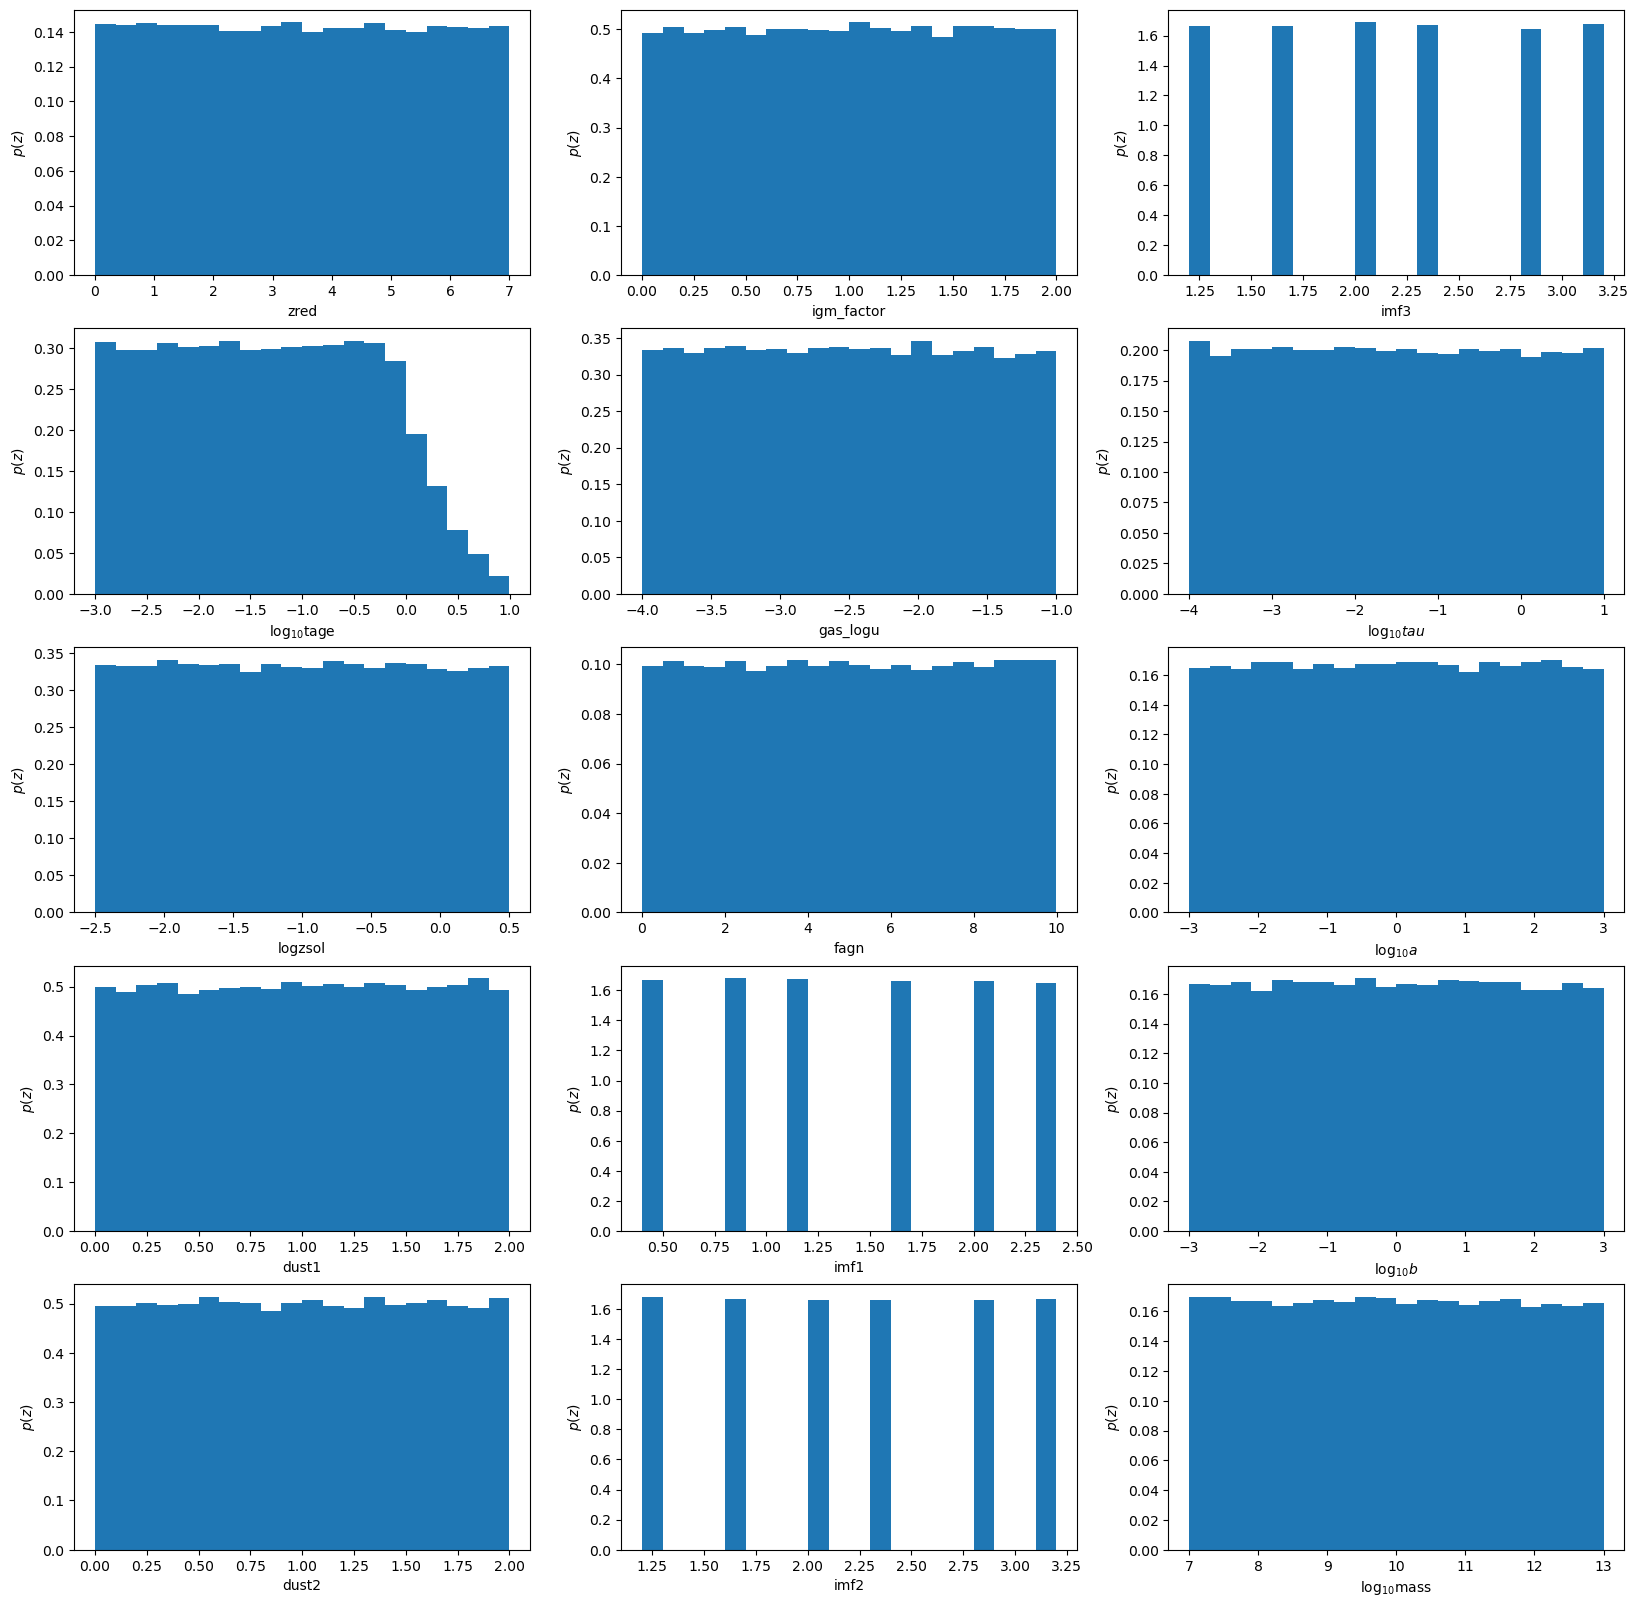

In [4]:
spsparams = tools.draw_sps_parameters(100000, hyperparameters)
tools.plot_galaxy_population(spsparams)
print(set(spsparams[:,8]), set(spsparams[:,9]), set(spsparams[:,10]))

In [5]:
data = tools.simulate_photometry(1, hyperparameters, dust_type=0, imf_type=2, zhistory=True, nebem=True, filters='all')

SPS Parameters Generated
Starting Run 1/3
libraries:  (b'mist', b'miles', b'DL07')
Run 1/3 Complete
Starting Run 2/3
Run 2/3 Complete
Starting Run 3/3
Run 3/3 Complete
Complete


Galaxy Age (Gyr): 0.0013218951484869363
Age of the universe at given redshift (Gyr): 1.3269359231403768
Redshift: 4.5787711542252145
Observed Metallicity (Absolute Metallicity): 5.0222647395508134e-05


(array([4.49043428e-05, 4.49043511e-05, 4.49043595e-05, 4.49043680e-05,
        4.49043765e-05, 4.49043852e-05, 4.49043939e-05, 4.49044027e-05,
        4.49044116e-05, 4.49044206e-05, 4.49044296e-05, 4.49044388e-05,
        4.49044480e-05, 4.49044573e-05, 4.49044667e-05, 4.49044762e-05,
        4.49044857e-05, 4.49044954e-05, 4.49045052e-05, 4.49045150e-05,
        4.49045249e-05, 4.49045350e-05, 4.49045451e-05, 4.49045553e-05,
        4.49045656e-05, 4.49045760e-05, 4.49045865e-05, 4.49045971e-05,
        4.49046078e-05, 4.49046186e-05, 4.49046295e-05, 4.49046405e-05,
        4.49046516e-05, 4.49046629e-05, 4.49046742e-05, 4.49046856e-05,
        4.49046971e-05, 4.49047088e-05, 4.49047205e-05, 4.49047324e-05,
        4.49047443e-05, 4.49047564e-05, 4.49047686e-05, 4.49047809e-05,
        4.49047933e-05, 4.49048058e-05, 4.49048185e-05, 4.49048313e-05,
        4.49048442e-05, 4.49048572e-05, 4.49048703e-05, 4.49048835e-05,
        4.49048969e-05, 4.49049104e-05, 4.49049240e-05, 4.490493

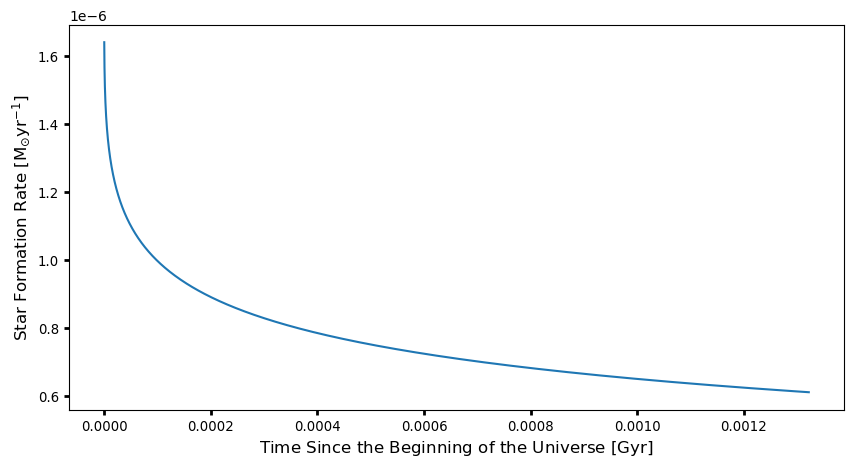

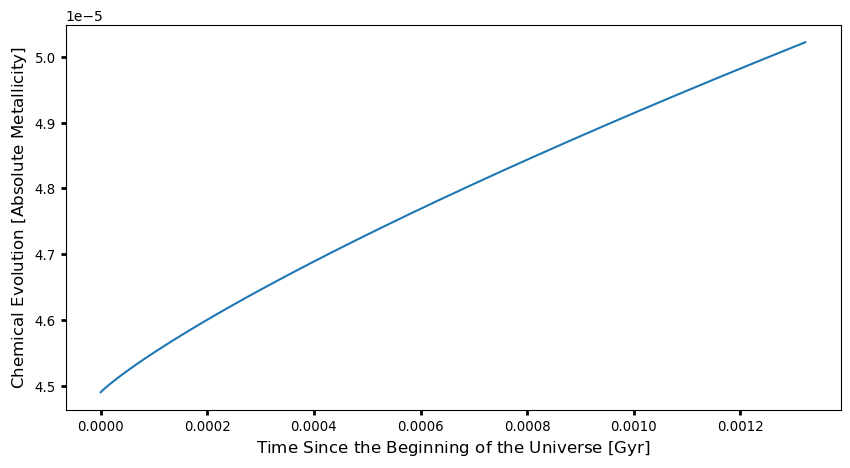

In [6]:
tools.sfh_zhis_diag(data[1], 0)